# Statistical Analysis of Covid-19 Lockdown Measures

SARS-CoV-2, a tiny virus, severely affects our planet's social, economic, and environmental sustainability, causing infections and deaths (6,029,851
deaths, as of 11 March 2022); relationship breakdowns, depression, economic downturn, riots, and much more. The lessons that have been
learned from good practices by various countries include containing the virus rapidly; enforcing containment measures; growing COVID-19 testing
capability; discovering cures; providing stimulus packages to the affected; easing monetary policies; developing new pandemic-related industries;
supporting plans for controlling unemployment; and overcoming inequalities. Coordination and multi-term plannings are the keys among
the successful national and global endeavors to fight the pandemic. The current research and practice have mainly focused on specific aspects of
COVID-19 response. There is a need to automate the learning process such that we can learn from good and bad practices during pandemics times.
Lockdown is one of the widely used measures for controlling the pandemic.

# Problem
Lockdown measures are used as a primary tool, assuming that they will help to decrease the infections. However, with time, more and more scientific evidence appears that most of the lockdown measures do not play any role in increasing or decreasing the number of daily cases. It is important to understand the effect of lockdown measures on daily cases
as they severely affect socio-economic parameters. For example, it is well proven by many pieces of research that the closing down of schools has no relation to infections in children. Therefore, it is very critical to understand
the relationships between daily cases and lockdown measures. This will help us in two ways: (1) to mitigate socio-economic effects, and (2) to use the best possible set of lockdown measures only, which impacts daily cases.

**Importing required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics as st
import math

In [2]:
#Importing the dataset
df = pd.read_csv('India.csv')
df.head()

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0


In [3]:
df.tail()

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
774,06-03-2022,42967315.0,0.0,967279389.0,801141086.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,07-03-2022,42971308.0,0.0,967460932.0,802358408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,08-03-2022,42975883.0,0.0,967725805.0,804228336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,09-03-2022,42980067.0,0.0,967946798.0,805886615.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,10-03-2022,42984261.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EDA Performance 

In [4]:
#Checking for shape
df.shape

(779, 16)

In [5]:
#Checking for null values
df.isna().sum()

date                                     0
confirmed                                8
vaccines                                 0
people_vaccinated                      371
people_fully_vaccinated                400
school_closing                           6
workplace_closing                       10
cancel_events                           10
gatherings_restrictions                  6
transport_closing                       10
stay_home_restrictions                  10
internal_movement_restrictions          10
international_movement_restrictions     10
information_campaigns                   10
contact_tracing                         10
facial_coverings                        10
dtype: int64

In [6]:
#How the null values are proportionating in the dataset
print(round(df.isnull().mean()*100,2))

date                                    0.00
confirmed                               1.03
vaccines                                0.00
people_vaccinated                      47.63
people_fully_vaccinated                51.35
school_closing                          0.77
workplace_closing                       1.28
cancel_events                           1.28
gatherings_restrictions                 0.77
transport_closing                       1.28
stay_home_restrictions                  1.28
internal_movement_restrictions          1.28
international_movement_restrictions     1.28
information_campaigns                   1.28
contact_tracing                         1.28
facial_coverings                        1.28
dtype: float64


<AxesSubplot:>

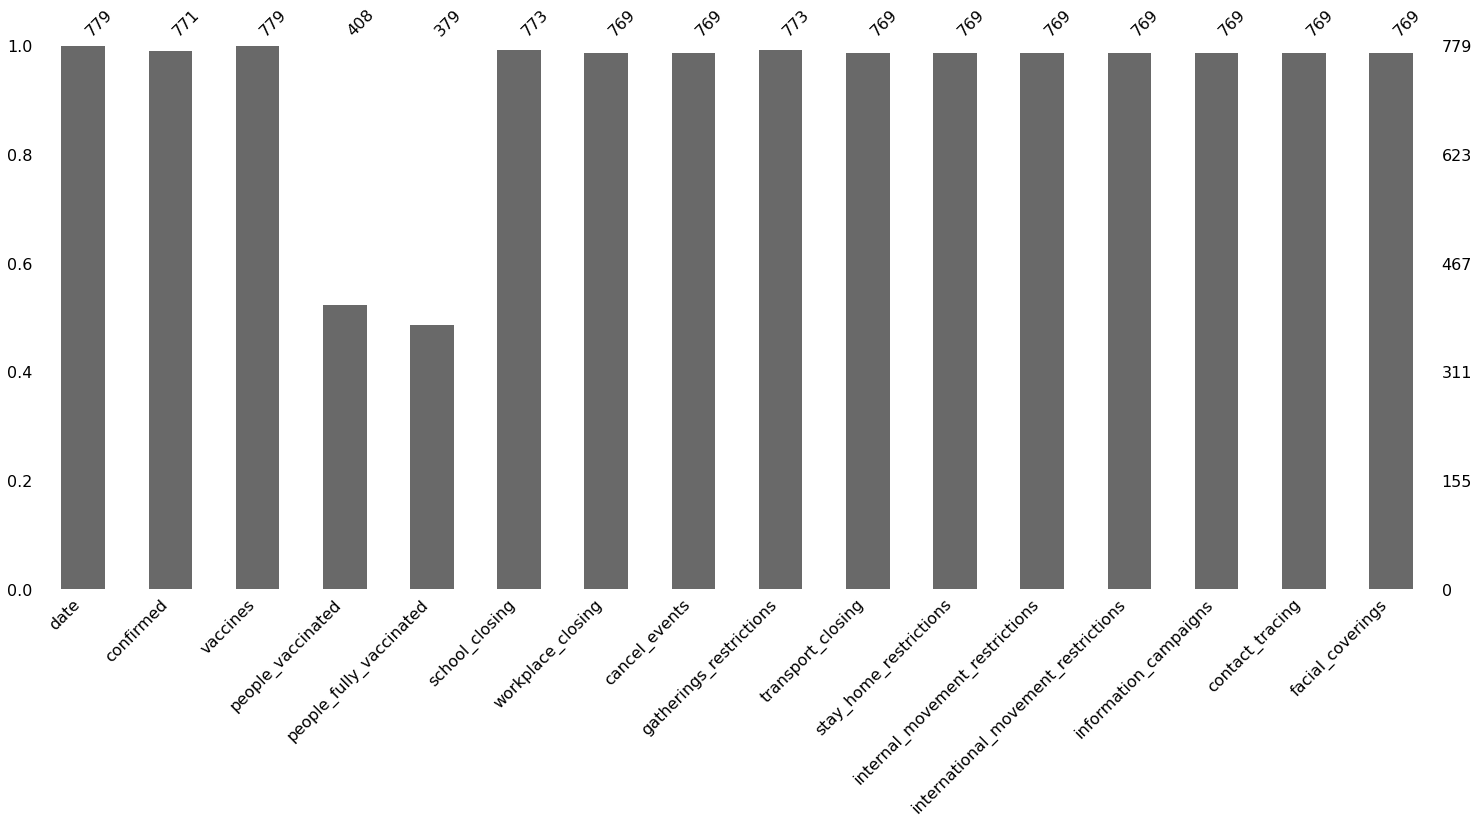

In [7]:
#Checking for null values in various ways
import missingno as msno
msno.bar(df)

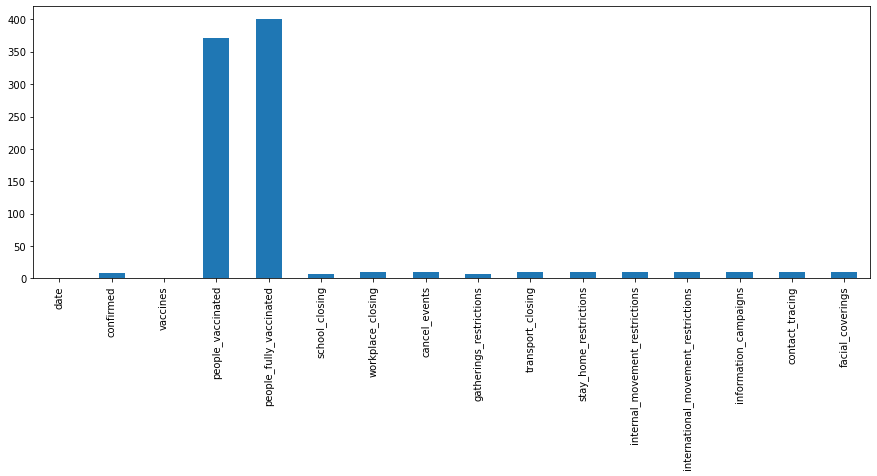

According to the null values proportion the dataset has much more missing values in 2 columns only


In [8]:
#Visualization of null Values using bar graph. 
plt.figure(figsize=(15,5))
df.isna().sum().plot(kind='bar')
plt.show()
print('According to the null values proportion the dataset has much more missing values in 2 columns only')

In [9]:
#chekcing for the columns with missing values
df[['confirmed','people_vaccinated','people_fully_vaccinated']]
print('This shows that this features are cumulative sum of the original dataset which may be recorded on daily basis')

This shows that this features are cumulative sum of the original dataset which may be recorded on daily basis


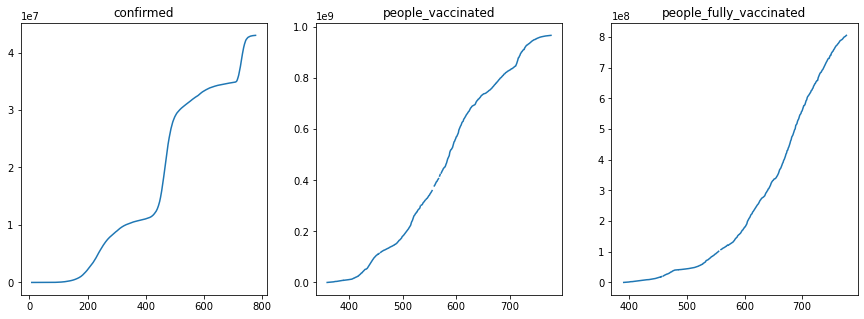

This distortion in the 2 columns show that there is a huge drop in the numbers due to which other dataset would be hampered


In [10]:
## Checking for how the dataset is affected due to this missing values
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(df['confirmed'])
plt.title("confirmed")

plt.subplot(1, 3, 2)
plt.plot(df['people_vaccinated'])
plt.title("people_vaccinated")

plt.subplot(1,3,3)
plt.plot(df['people_fully_vaccinated'])
plt.title("people_fully_vaccinated")

plt.show()
print('This distortion in the 2 columns show that there is a huge drop in the numbers due to which other dataset would be hampered')

In [11]:
#how this missing cumuative dataset be handled is an important task.for that we will be using forward fill method.
df[['confirmed','people_vaccinated',
    'people_fully_vaccinated']] = df[['confirmed','people_vaccinated', 
                                      'people_fully_vaccinated']].fillna(method='bfill')

In [12]:
#This removed the null values and inplace of this ths data below missing values is been pulled.  
df[['confirmed','people_vaccinated','people_fully_vaccinated']]

,confirmed,people_vaccinated,people_fully_vaccinated
0,1.0,0.0,7668.0
1,1.0,0.0,7668.0
2,1.0,0.0,7668.0
3,1.0,0.0,7668.0
4,1.0,0.0,7668.0
...,...,...,...
774,42967315.0,967279389.0,801141086.0
775,42971308.0,967460932.0,802358408.0
776,42975883.0,967725805.0,804228336.0
777,42980067.0,967946798.0,805886615.0


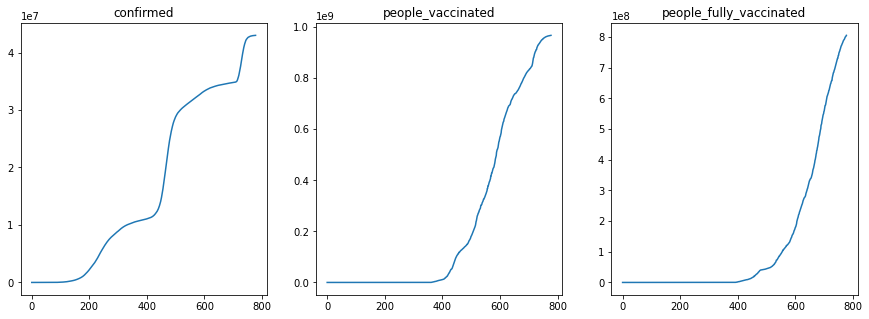

In [13]:
#To check that distortion is removed or not, we will be plotting te graph again.
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(df['confirmed'])
plt.title("confirmed")

plt.subplot(1, 3, 2)
plt.plot(df['people_vaccinated'])
plt.title("people_vaccinated")

plt.subplot(1,3,3)
plt.plot(df['people_fully_vaccinated'])
plt.title("people_fully_vaccinated")

plt.show()

Still there are some missing values are present.but it does not hampers the dataset, so we can drop those na values

In [14]:
df.isna().sum()

date                                    0
confirmed                               0
vaccines                                0
people_vaccinated                       1
people_fully_vaccinated                 1
school_closing                          6
workplace_closing                      10
cancel_events                          10
gatherings_restrictions                 6
transport_closing                      10
stay_home_restrictions                 10
internal_movement_restrictions         10
international_movement_restrictions    10
information_campaigns                  10
contact_tracing                        10
facial_coverings                       10
dtype: int64

In [15]:
#Checking for the shape before dropping na values, as this missing values can be in any row or multiple rows.
df.shape

(779, 16)

In [16]:
#Dropping the na values
df.dropna(axis=0, inplace=True)

In [17]:
#Checking for the alteration done properly or not. 
df.isna().sum()

date                                   0
confirmed                              0
vaccines                               0
people_vaccinated                      0
people_fully_vaccinated                0
school_closing                         0
workplace_closing                      0
cancel_events                          0
gatherings_restrictions                0
transport_closing                      0
stay_home_restrictions                 0
internal_movement_restrictions         0
international_movement_restrictions    0
information_campaigns                  0
contact_tracing                        0
facial_coverings                       0
dtype: int64

In [18]:
#The dataset has removed all null values and the data is clean as we wanted for further processing.
df.shape

(769, 16)

In [19]:
df

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,24-02-2022,42894345.0,0.0,964304634.0,782222068.0,-3.0,-2.0,-2.0,-4.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,3.0
765,25-02-2022,42905844.0,0.0,964818498.0,785172630.0,-3.0,-2.0,-2.0,-4.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,3.0
766,26-02-2022,42916117.0,0.0,965336168.0,788213991.0,-3.0,-2.0,-2.0,-4.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,3.0
767,27-02-2022,42924130.0,0.0,965531308.0,789372639.0,-3.0,-2.0,-2.0,-4.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,3.0


As the dataset is now free of na values, we can move further

In [20]:
#Checing for the description of the dataframe. 
df.describe()

,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
count,7.690000e+02,769.0,7.690000e+02,7.690000e+02,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,1.646299e+07,0.0,2.345384e+08,1.216880e+08,-0.858257,-1.802341,-0.479844,-2.782835,-0.682705,-1.574772,-0.905072,2.962289,1.940182,1.433030,0.418726
std,1.452621e+07,0.0,3.296933e+08,2.154346e+08,2.428549,1.460395,1.817858,2.145955,1.335893,1.684778,1.516434,0.871949,0.253230,0.506213,3.645983
min,1.000000e+00,0.0,0.000000e+00,7.668000e+03,-3.000000,-3.000000,-2.000000,-4.000000,-2.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-4.000000
25%,1.750723e+06,0.0,0.000000e+00,7.668000e+03,-3.000000,-3.000000,-2.000000,-4.000000,-2.000000,-3.000000,-2.000000,2.000000,2.000000,1.000000,-4.000000
50%,1.085837e+07,0.0,6.611561e+06,7.668000e+03,-2.000000,-2.000000,-2.000000,-4.000000,0.000000,-2.000000,-2.000000,3.000000,2.000000,1.000000,2.000000
75%,3.239329e+07,0.0,4.461022e+08,1.271033e+08,3.000000,-2.000000,2.000000,-2.000000,0.000000,-2.000000,0.000000,4.000000,2.000000,2.000000,4.000000
max,4.293104e+07,0.0,9.657336e+08,7.905563e+08,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000


The description is not much readable, but can interpret that we can find the mean and median values, which is required to check for the distribution of the dataset

**Mean calculations :-**

In [21]:
print('The mean for confirmed is :',(round(df['confirmed'].mean(),2)))
print('The mean for vaccines is :',(round(df['vaccines'].mean(),2)))
print('The mean for people_vaccinated is :',(round(df['people_vaccinated'].mean(),2)))
print('The mean for people_fully_vaccinated is :',(round(df['people_fully_vaccinated'].mean(),2)))
print('The mean for school_closing is :',(round(df['school_closing'].mean(),2)))
print('The mean for workplace_closing is :',(round(df['workplace_closing'].mean(),2)))
print('The mean for cancel_events is :',(round(df['cancel_events'].mean(),2)))
print('The mean for gatherings_restrictions is :',(round(df['gatherings_restrictions'].mean(),2)))
print('The mean for transport_closing is :',(round(df['transport_closing'].mean(),2)))
print('The mean for stay_home_restrictions is :',(round(df['stay_home_restrictions'].mean(),2)))
print('The mean for internal_movement_restrictions is :',(round(df['internal_movement_restrictions'].mean(),2)))
print('The mean for international_movement_restrictions is :',(round(df['international_movement_restrictions'].mean(),2)))
print('The mean for information_campaigns is :',(round(df['information_campaigns'].mean(),2)))
print('The mean for contact_tracing is :',(round(df['contact_tracing'].mean(),2)))
print('The mean for facial_coverings is :',(round(df['facial_coverings'].mean(),2)))

The mean for confirmed is : 16462988.3
The mean for vaccines is : 0.0
The mean for people_vaccinated is : 234538431.47
The mean for people_fully_vaccinated is : 121687968.76
The mean for school_closing is : -0.86
The mean for workplace_closing is : -1.8
The mean for cancel_events is : -0.48
The mean for gatherings_restrictions is : -2.78
The mean for transport_closing is : -0.68
The mean for stay_home_restrictions is : -1.57
The mean for internal_movement_restrictions is : -0.91
The mean for international_movement_restrictions is : 2.96
The mean for information_campaigns is : 1.94
The mean for contact_tracing is : 1.43
The mean for facial_coverings is : 0.42


**Median calculations :-**

In [22]:
print('The median for confirmed is :',(round(df['confirmed'].median(),2)))
print('The median for vaccines is :',(round(df['vaccines'].median(),2)))
print('The median for people_vaccinated is :',(round(df['people_vaccinated'].median(),2)))
print('The median for people_fully_vaccinated is :',(round(df['people_fully_vaccinated'].median(),2)))
print('The median for school_closing is :',(round(df['school_closing'].median(),2)))
print('The median for workplace_closing is :',(round(df['workplace_closing'].median(),2)))
print('The median for cancel_events is :',(round(df['cancel_events'].median(),2)))
print('The median for gatherings_restrictions is :',(round(df['gatherings_restrictions'].median(),2)))
print('The median for transport_closing is :',(round(df['transport_closing'].mean(),2)))
print('The median for stay_home_restrictions is :',(round(df['stay_home_restrictions'].median(),2)))
print('The median for internal_movement_restrictions is :',(round(df['internal_movement_restrictions'].median(),2)))
print('The median for international_movement_restrictions is :',(round(df['international_movement_restrictions'].median(),2)))
print('The median for information_campaigns is :',(round(df['information_campaigns'].median(),2)))
print('The median for contact_tracing is :',(round(df['contact_tracing'].median(),2)))
print('The median for facial_coverings is :',(round(df['facial_coverings'].median(),2)))

The median for confirmed is : 10858371.0
The median for vaccines is : 0.0
The median for people_vaccinated is : 6611561.0
The median for people_fully_vaccinated is : 7668.0
The median for school_closing is : -2.0
The median for workplace_closing is : -2.0
The median for cancel_events is : -2.0
The median for gatherings_restrictions is : -4.0
The median for transport_closing is : -0.68
The median for stay_home_restrictions is : -2.0
The median for internal_movement_restrictions is : -2.0
The median for international_movement_restrictions is : 3.0
The median for information_campaigns is : 2.0
The median for contact_tracing is : 1.0
The median for facial_coverings is : 2.0


**We can interpret that the mean and medians are not much relatable, can we check out them graphically?**

Yes, We can check them on graphs for better visualization 

In [23]:
#Defining functions for the Mean, median and mode plotting across the dataset.
def central_tendency(df, col_list):
    mean_col, median_col, mode_col = [], [], []
    for col in col_list:
        ser = df[col]
        mean_col.append(ser.mean())
        median_col.append(ser.median())
        mode_col.extend(ser.mode())        
    return mean_col, median_col, mode_col

def plot_central_tendency(df, mean_col, median_col, mode_col, col_list):
    for i,col in enumerate(col_list):
        print(col)
        plt.figure(figsize = (5,5))
        mean = mean_col[i]
        median = median_col[i]
        mode = mode_col[i]
        data = df[col]
        plt.hist(data, histtype='stepfilled', alpha=0.2)
        plt.axvline(x=mean, label='mean={}'.format(mean), c='r')
        plt.axvline(x=median, label='median={}'.format(median), c='g')
        plt.axvline(x=mode, label='mode={}'.format(mode), c='k')
        plt.legend(loc="upper right")
        plt.show()
        plt.clf()
        plt.close()

In [24]:
#Dropping not required features
new_df = df.drop(['date','vaccines'], axis=1)

confirmed


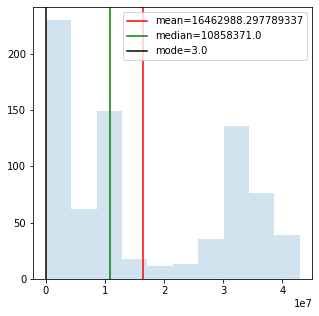

people_vaccinated


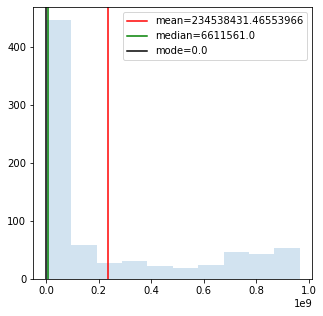

people_fully_vaccinated


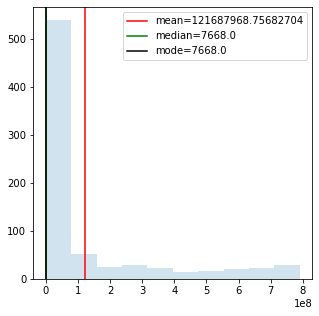

school_closing


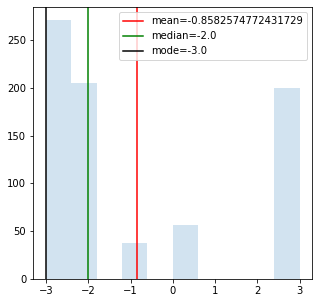

workplace_closing


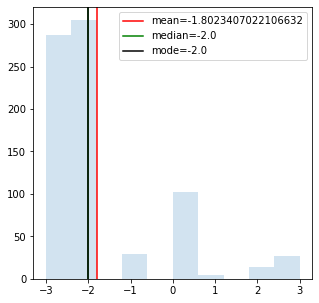

cancel_events


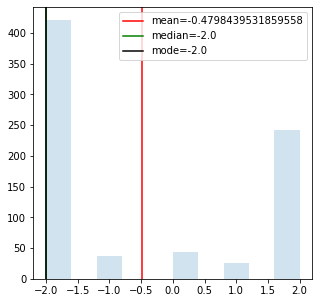

gatherings_restrictions


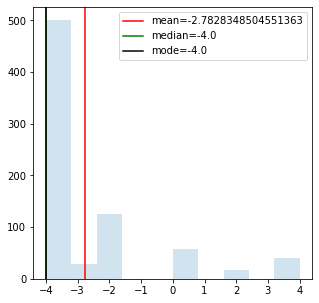

transport_closing


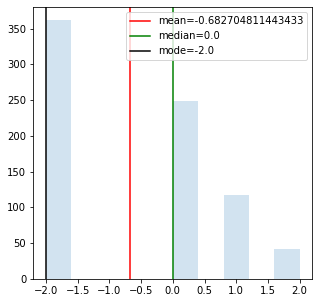

stay_home_restrictions


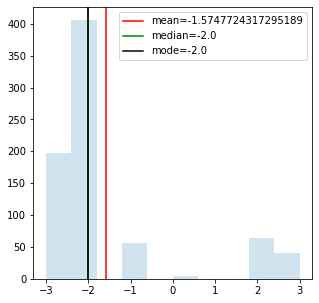

internal_movement_restrictions


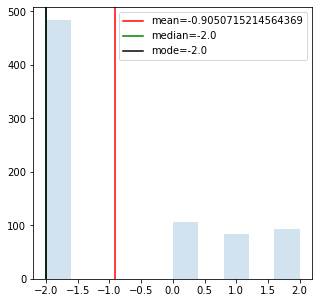

international_movement_restrictions


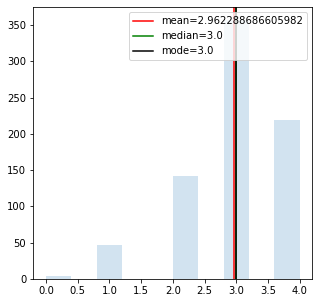

information_campaigns


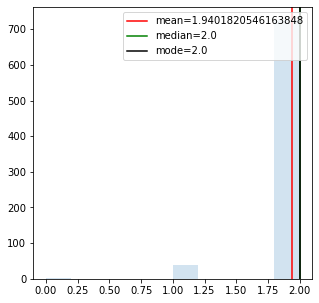

contact_tracing


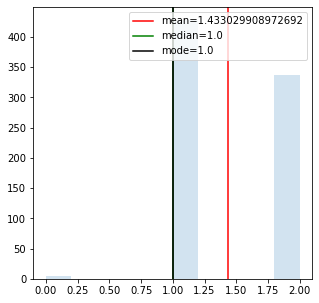

facial_coverings


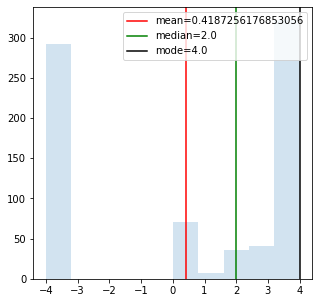

In [25]:
col_list = new_df.columns

mean_col, median_col, mode_col = central_tendency(new_df, col_list)

plot_central_tendency(new_df, mean_col, median_col, mode_col, col_list)

**From here its clear that the datasets are not much closer, so what about its distribution. Can we check for that also?**

In [26]:
#Columns used for reference 
df.columns

Index(['date', 'confirmed', 'vaccines', 'people_vaccinated',
       'people_fully_vaccinated', 'school_closing', 'workplace_closing',
       'cancel_events', 'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'contact_tracing', 'facial_coverings'],
      dtype='object')

In [27]:
#Defining functions for the distribution formed
def central_tendency(df, col_list):
    mean_col, median_col, mode_col = [], [], []
    for col in col_list:
        ser = df[col]
        mean_col.append(ser.mean())
        median_col.append(ser.median())
        mode_col.extend(ser.mode())        
    return mean_col, median_col, mode_col

def histogram(df, mean_col, median_col, mode_col, col_list):
    for i,col in enumerate(col_list):
        print(col)
        plt.figure(figsize = (15,5))
        mean = mean_col[i]
        median = median_col[i]
        mode = mode_col[i]
        data = df[col]
        sns.distplot(data, hist=False)
        plt.axvline(x=mean, label='mean={}'.format(mean), c='r')
        plt.axvline(x=median, label='median={}'.format(median), c='g')
        plt.axvline(x=mode, label='mode={}'.format(mode), c='k')
        plt.legend(loc="upper right")
        plt.show()
        plt.clf()
        plt.close()

confirmed


C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


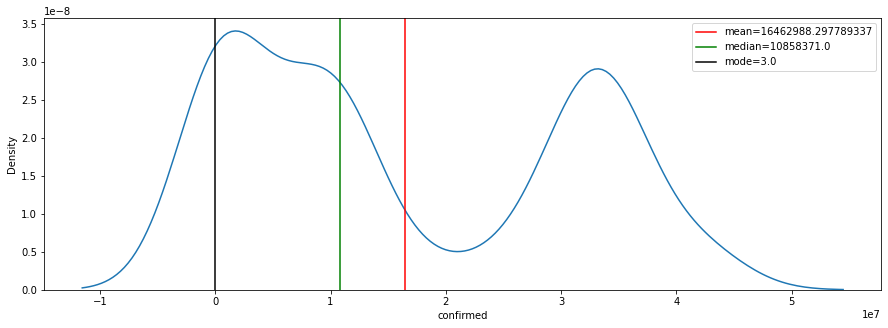

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


people_vaccinated


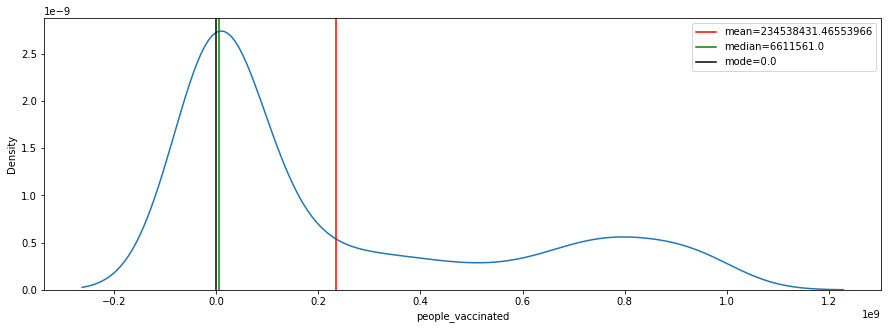

people_fully_vaccinated


C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


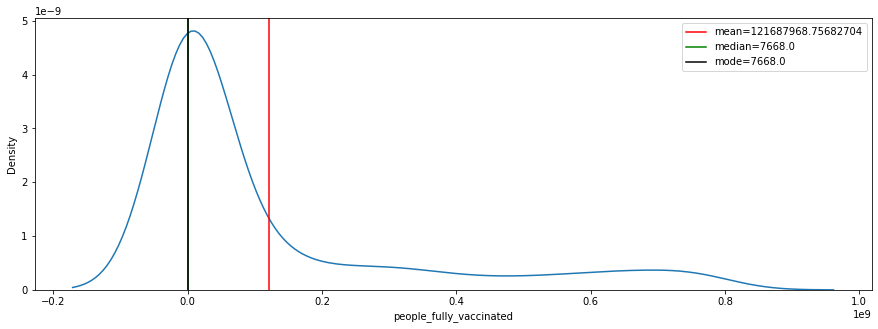

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


school_closing


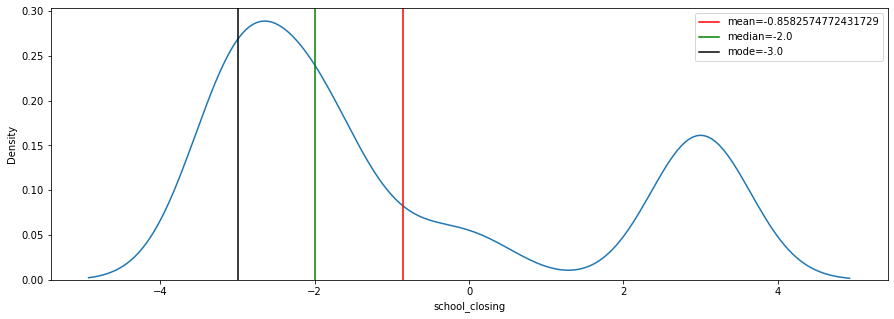

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


workplace_closing


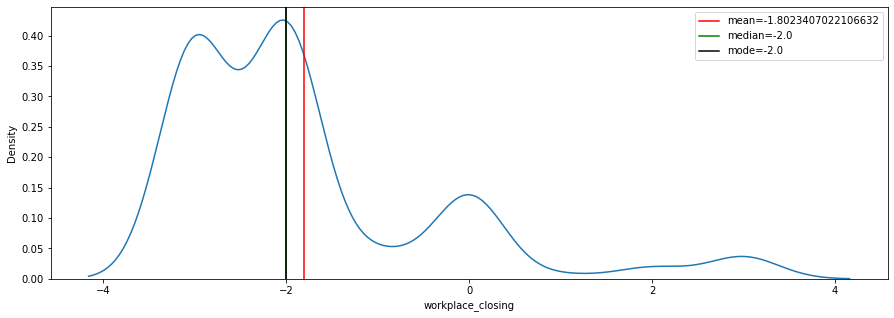

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


cancel_events


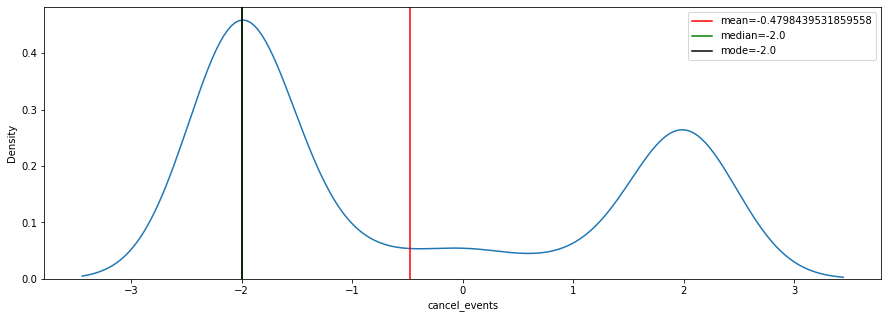

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


gatherings_restrictions


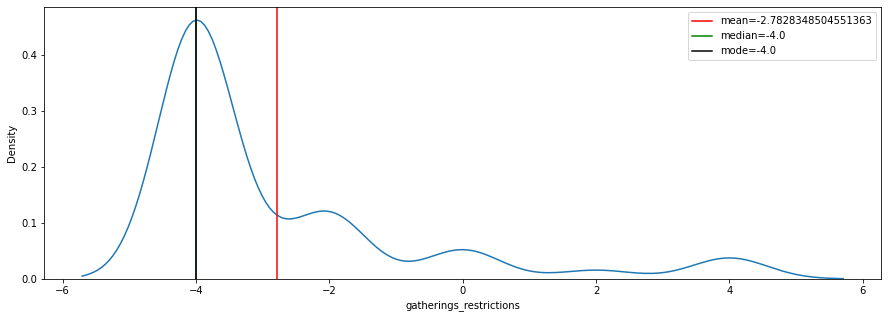

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


transport_closing


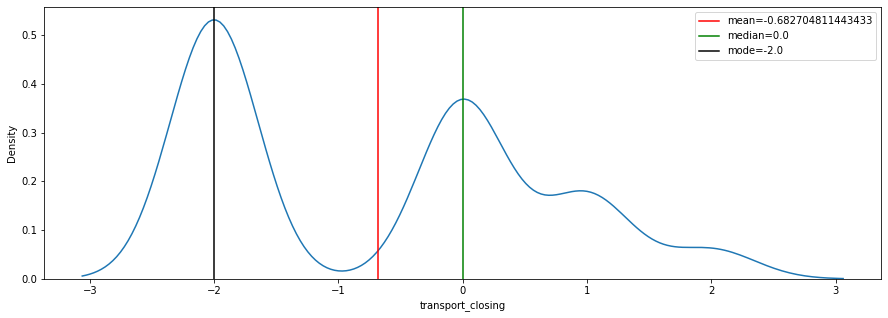

stay_home_restrictions


C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


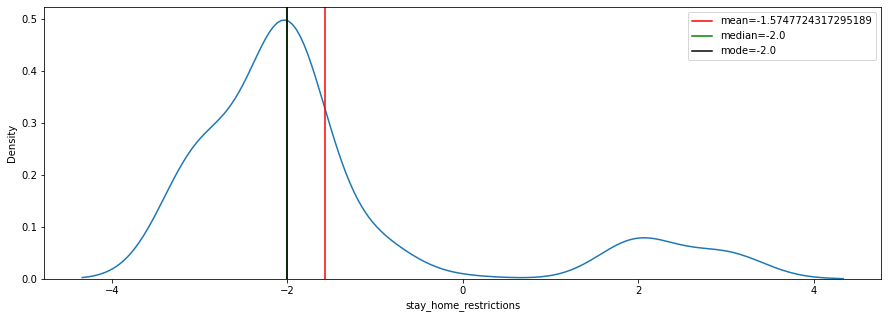

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


internal_movement_restrictions


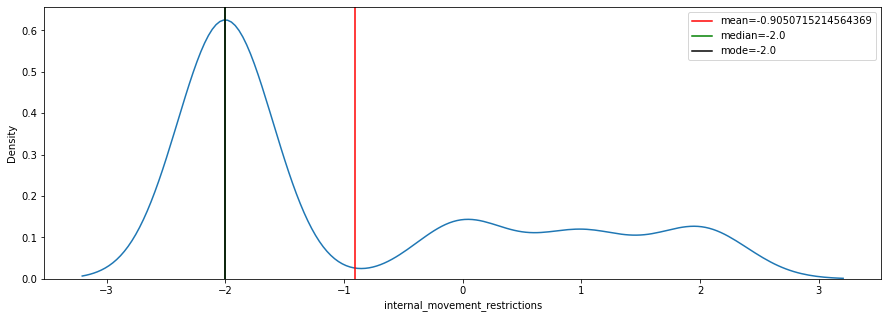

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


international_movement_restrictions


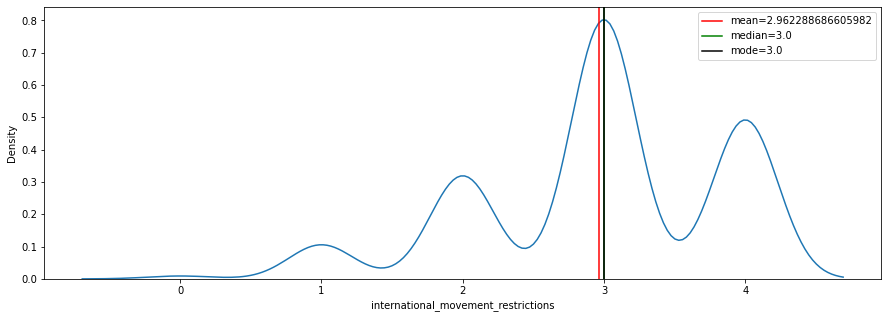

information_campaigns


C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


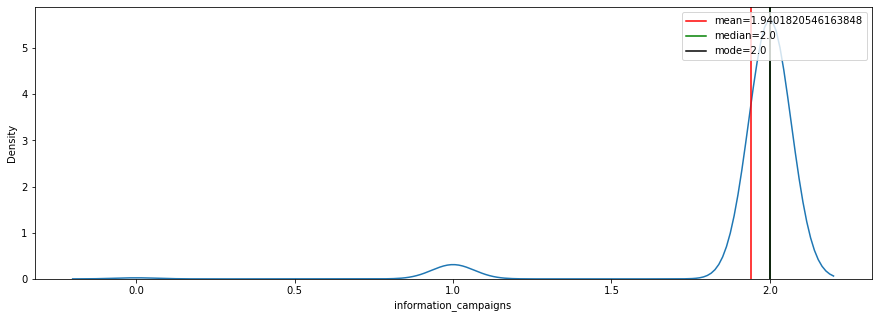

contact_tracing


C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


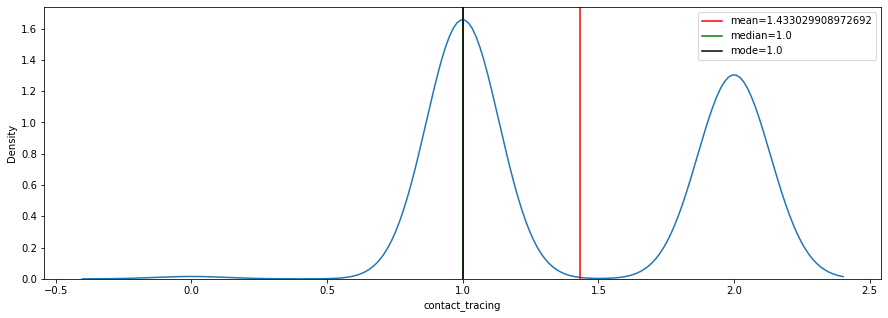

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


facial_coverings


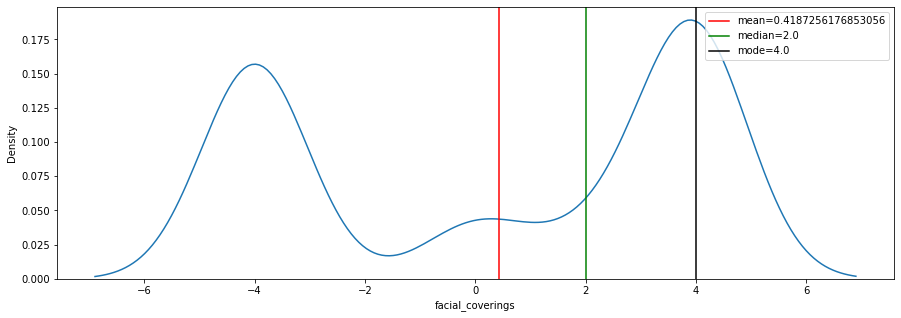

In [28]:
#Plotting the distribution
col_list = new_df.columns

mean_col, median_col, mode_col = central_tendency(new_df, col_list)

histogram(new_df, mean_col, median_col, mode_col, col_list)

**Stats Interfere that the data points for each feature has no normal distribution.**

Hows the correlation or how the datapoints are affecting each other?

<AxesSubplot:>

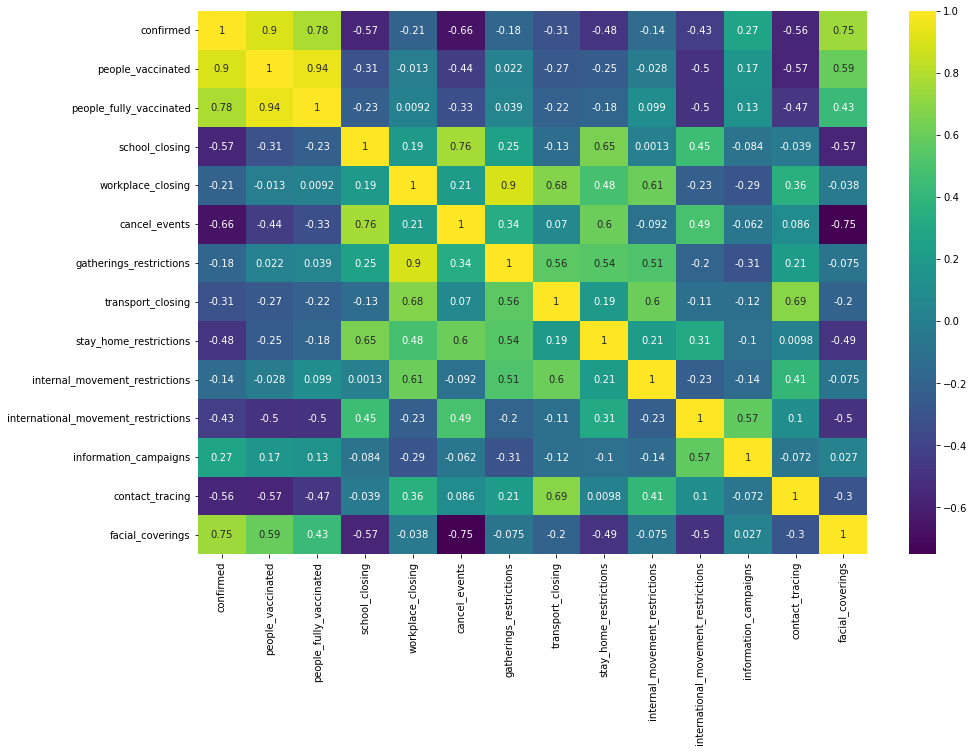

In [29]:
#Plotting a correlation graph 
new_df1 = df.drop('vaccines', axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(new_df1.corr(), cmap='viridis', annot = True)

From here we can interpret that the measures taken to reduce the confirmed numbers shall be negatively correlated to each other.

Trying to groupby the data to have a look for better ratio number.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 768
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 769 non-null    object 
 1   confirmed                            769 non-null    float64
 2   vaccines                             769 non-null    float64
 3   people_vaccinated                    769 non-null    float64
 4   people_fully_vaccinated              769 non-null    float64
 5   school_closing                       769 non-null    float64
 6   workplace_closing                    769 non-null    float64
 7   cancel_events                        769 non-null    float64
 8   gatherings_restrictions              769 non-null    float64
 9   transport_closing                    769 non-null    float64
 10  stay_home_restrictions               769 non-null    float64
 11  internal_movement_restrictions  

In [31]:
#Converting the datatype of date column into datetime
df['date'] = pd.to_datetime(df['date'])

In [32]:
#ReChecking for the datatype is changed or not
df['date'].dtype

dtype('<M8[ns]')

In [33]:
#grouping the dataset
grouped_df = df.groupby(df.date.dt.month).sum()
grouped_df

,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
date,,,,,,,,,,,,,,,
1,1.342714e+09,0.0,2.309228e+10,1.562781e+10,-59.0,-136.0,-89.0,-213.0,-37.0,-134.0,15.0,175.0,131.0,101.0,36.0
2,1.259676e+09,0.0,2.109017e+10,1.516255e+10,-114.0,-107.0,-77.0,-195.0,-44.0,-130.0,-40.0,171.0,129.0,119.0,126.0
3,6.225556e+08,0.0,6.327347e+09,2.937499e+09,-34.0,-62.0,-54.0,-131.0,-8.0,-85.0,-7.0,196.0,124.0,113.0,90.0
4,6.940109e+08,0.0,7.621603e+09,3.166104e+09,-23.0,-53.0,-13.0,-75.0,16.0,-42.0,-23.0,200.0,120.0,108.0,14.0
5,9.058978e+08,0.0,8.491937e+09,3.626170e+09,-26.0,-143.0,-12.0,-227.0,-94.0,-137.0,-99.0,207.0,125.0,93.0,14.0
6,9.515585e+08,0.0,9.903357e+09,3.780706e+09,-26.0,-156.0,-12.0,-219.0,-88.0,-60.0,-95.0,200.0,121.0,72.0,14.0
7,1.023802e+09,0.0,1.206818e+10,4.583275e+09,-20.0,-162.0,-12.0,-227.0,-92.0,-50.0,-99.0,207.0,125.0,74.0,14.0
8,1.081393e+09,0.0,1.435948e+10,5.402058e+09,-7.0,-146.0,-12.0,-225.0,-92.0,-117.0,-103.0,207.0,125.0,74.0,14.0
9,1.112444e+09,0.0,1.677192e+10,6.706157e+09,-66.0,-138.0,-12.0,-181.0,-88.0,-113.0,-100.0,200.0,121.0,72.0,9.0


The numbers are quite high and the significance is not accurate.

<AxesSubplot:>

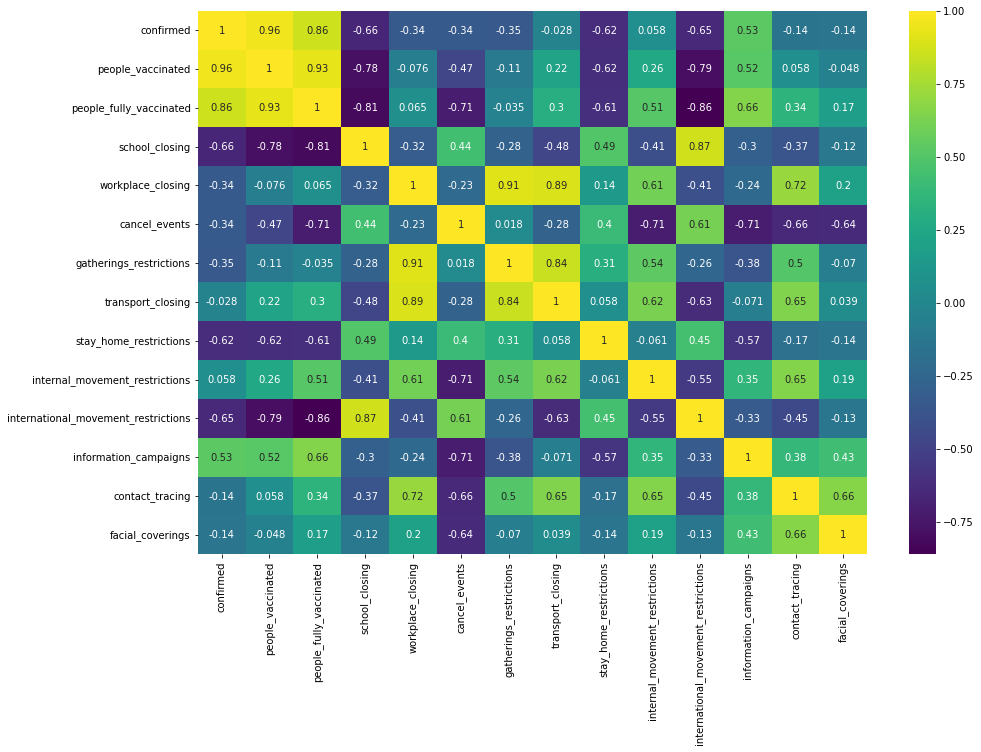

In [34]:
#Checkimg in the correlation that grouping has not changed the feature relationship
new_df1 = grouped_df.drop('vaccines', axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(new_df1.corr(), cmap='viridis', annot = True, )

The dataset is segregated properly, But due to the cumulative calculation, it diversifies the dataset and teh convergence is loosing. So choosing for an alternative option.

# ALTERNATIVE

In [35]:
df

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,2020-01-22,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2020-01-26,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,2022-02-24,42894345.0,0.0,964304634.0,782222068.0,-3.0,-2.0,-2.0,-4.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,3.0
765,2022-02-25,42905844.0,0.0,964818498.0,785172630.0,-3.0,-2.0,-2.0,-4.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,3.0
766,2022-02-26,42916117.0,0.0,965336168.0,788213991.0,-3.0,-2.0,-2.0,-4.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,3.0
767,2022-02-27,42924130.0,0.0,965531308.0,789372639.0,-3.0,-2.0,-2.0,-4.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,3.0


In [36]:
df_new = df.drop('vaccines', axis=1)

**Here we will be getting the actual daily data from the cumulative sum data**

In [37]:
df_new
df_new['confirmed'] = df_new['confirmed'].diff(1)
df_new['people_vaccinated'] = df_new['people_vaccinated'].diff(1)
df_new['people_fully_vaccinated'] = df_new['people_fully_vaccinated'].diff(1)

In [38]:
df_new

,date,confirmed,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,2020-01-22,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,2022-02-24,13166.0,462830.0,2660873.0,-3.0,-2.0,-2.0,-4.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,3.0
765,2022-02-25,11499.0,513864.0,2950562.0,-3.0,-2.0,-2.0,-4.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,3.0
766,2022-02-26,10273.0,517670.0,3041361.0,-3.0,-2.0,-2.0,-4.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,3.0
767,2022-02-27,8013.0,195140.0,1158648.0,-3.0,-2.0,-2.0,-4.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,3.0


As the data is been carried out, we can now move to handle the missing values.

In [39]:
df_new.isna().sum()

date                                   0
confirmed                              1
people_vaccinated                      1
people_fully_vaccinated                1
school_closing                         0
workplace_closing                      0
cancel_events                          0
gatherings_restrictions                0
transport_closing                      0
stay_home_restrictions                 0
internal_movement_restrictions         0
international_movement_restrictions    0
information_campaigns                  0
contact_tracing                        0
facial_coverings                       0
dtype: int64

In [40]:
#Backfilling the dataset for na values
df_new[['confirmed','people_vaccinated',
    'people_fully_vaccinated']] = df_new[['confirmed','people_vaccinated', 
                                      'people_fully_vaccinated']].fillna(method='bfill')

In [41]:
df_new.describe()

,confirmed,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
count,769.000000,7.690000e+02,7.690000e+02,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,55827.105332,1.255830e+06,1.028022e+06,-0.858257,-1.802341,-0.479844,-2.782835,-0.682705,-1.574772,-0.905072,2.962289,1.940182,1.433030,0.418726
std,82189.749123,1.877573e+06,1.741371e+06,2.428549,1.460395,1.817858,2.145955,1.335893,1.684778,1.516434,0.871949,0.253230,0.506213,3.645983
min,0.000000,0.000000e+00,0.000000e+00,-3.000000,-3.000000,-2.000000,-4.000000,-2.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-4.000000
25%,10549.000000,0.000000e+00,0.000000e+00,-3.000000,-3.000000,-2.000000,-4.000000,-2.000000,-3.000000,-2.000000,2.000000,2.000000,1.000000,-4.000000
50%,28326.000000,1.601480e+05,0.000000e+00,-2.000000,-2.000000,-2.000000,-4.000000,0.000000,-2.000000,-2.000000,3.000000,2.000000,1.000000,2.000000
75%,57711.000000,2.154934e+06,1.456713e+06,3.000000,-2.000000,2.000000,-2.000000,0.000000,-2.000000,0.000000,4.000000,2.000000,2.000000,4.000000
max,414188.000000,1.266605e+07,1.117515e+07,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000


In [42]:
#Now grouping to check for daily sets. 
grouped_df = df_new.groupby(df_new.date.dt.month).sum()
grouped_df

,confirmed,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
date,,,,,,,,,,,,,,
1,6754428.0,83801701.0,93558183.0,-59.0,-136.0,-89.0,-213.0,-37.0,-134.0,15.0,175.0,131.0,101.0,36.0
2,1847729.0,46873038.0,67188011.0,-114.0,-107.0,-77.0,-195.0,-44.0,-130.0,-40.0,171.0,129.0,119.0,126.0
3,2205677.0,62450096.0,26149671.0,-34.0,-62.0,-54.0,-131.0,-8.0,-85.0,-7.0,196.0,124.0,113.0,90.0
4,6835150.0,60689421.0,35935302.0,-23.0,-53.0,-13.0,-75.0,16.0,-42.0,-23.0,200.0,120.0,108.0,14.0
5,5952333.0,62637282.0,26738071.0,-26.0,-143.0,-12.0,-227.0,-94.0,-137.0,-99.0,207.0,125.0,93.0,14.0
6,2630683.0,102235850.0,29408567.0,-26.0,-156.0,-12.0,-219.0,-88.0,-60.0,-95.0,200.0,121.0,72.0,14.0
7,2928432.0,96475151.0,51922594.0,-20.0,-162.0,-12.0,-227.0,-92.0,-50.0,-99.0,207.0,125.0,74.0,14.0
8,3372311.0,117094835.0,57740581.0,-7.0,-146.0,-12.0,-225.0,-92.0,-117.0,-103.0,207.0,125.0,74.0,14.0
9,3464055.0,124451936.0,90100981.0,-66.0,-138.0,-12.0,-181.0,-88.0,-113.0,-100.0,200.0,121.0,72.0,9.0


Now the dataset looks proper in terms of the numbers.

In [43]:
#Again visualizing the dataset in terms of distribution.
def central_tendency(df_new, col_list):
    mean_col, median_col, mode_col = [], [], []
    for col in col_list:
        ser = df_new[col]
        mean_col.append(ser.mean())
        median_col.append(ser.median())
        mode_col.extend(ser.mode())        
    return mean_col, median_col, mode_col

def histogram(df_new, mean_col, median_col, mode_col, col_list):
    for i,col in enumerate(col_list):
        print(col)
        plt.figure(figsize = (15,5))
        mean = mean_col[i]
        median = median_col[i]
        mode = mode_col[i]
        data = df_new[col]
        sns.distplot(data, hist=False)
        plt.axvline(x=mean, label='mean={}'.format(mean), c='r')
        plt.axvline(x=median, label='median={}'.format(median), c='g')
        plt.axvline(x=mode, label='mode={}'.format(mode), c='k')
        plt.axvline(x=np.percentile(df_new[col], 75), label='75th Perc', c='m')
        plt.axvline(x=np.percentile(df_new[col], 25), label='25th Perc', c='y')
        plt.legend(loc="upper right")
        plt.show()
        plt.clf()
        plt.close()

In [44]:
#dropping the non required dataset
df_new1 = df_new.drop('date', axis=1)

confirmed


C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


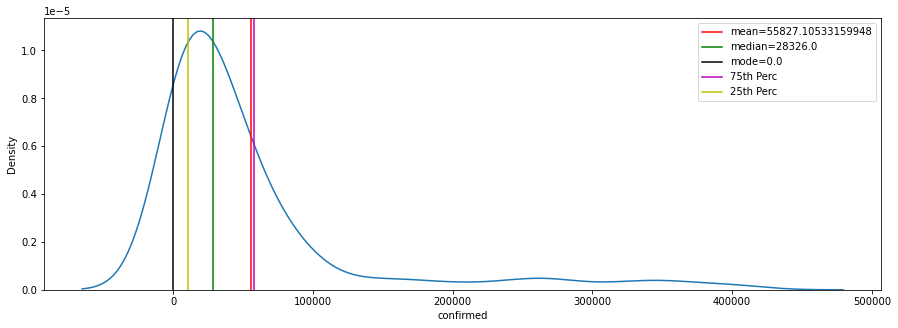

people_vaccinated


C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


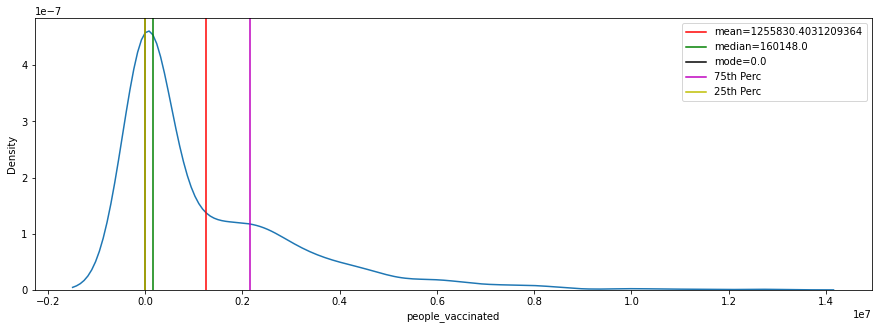

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


people_fully_vaccinated


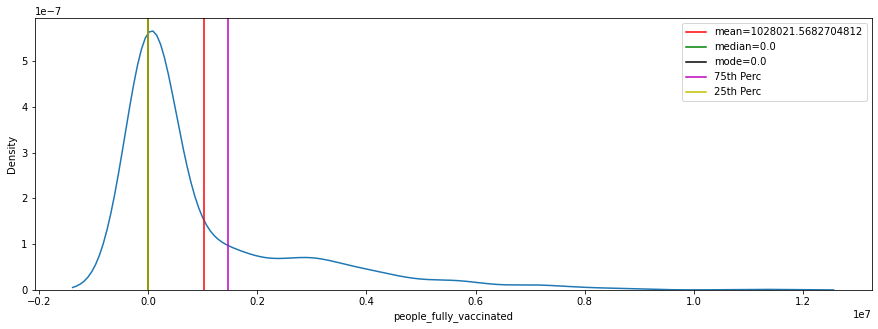

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


school_closing


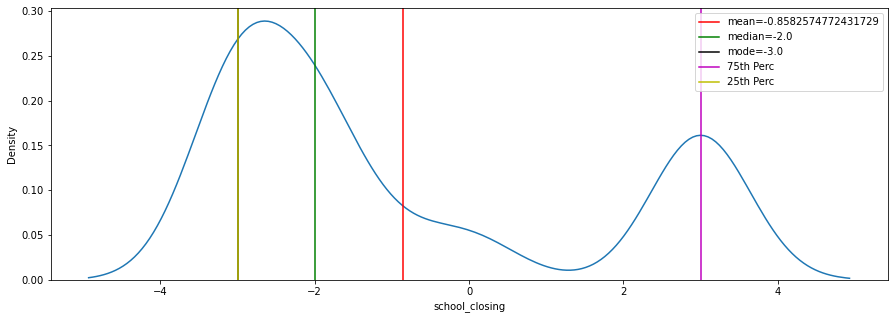

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


workplace_closing


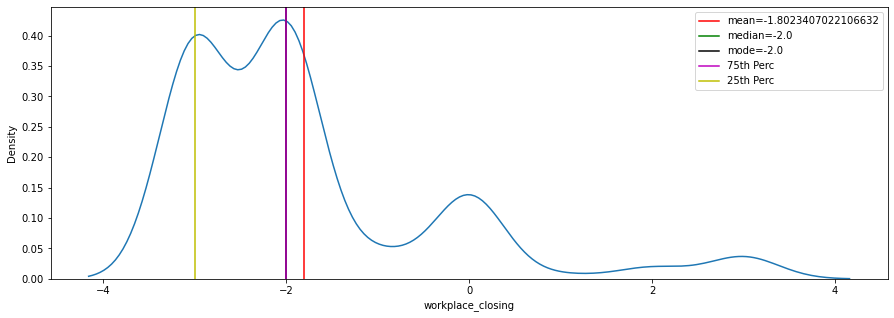

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


cancel_events


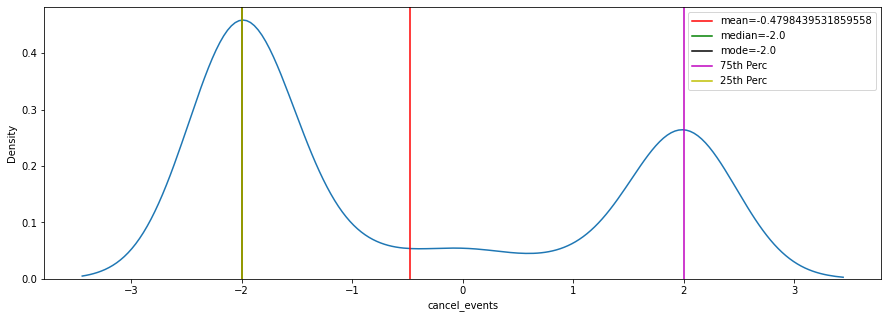

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


gatherings_restrictions


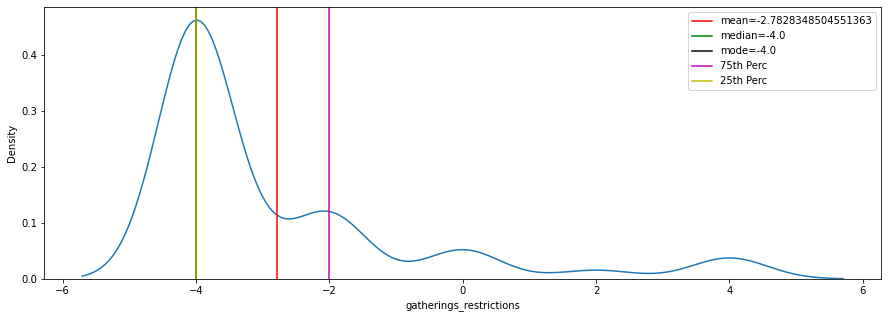

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


transport_closing


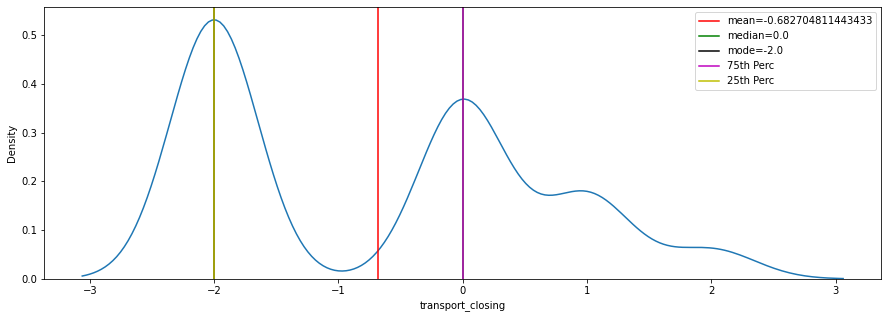

stay_home_restrictions


C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


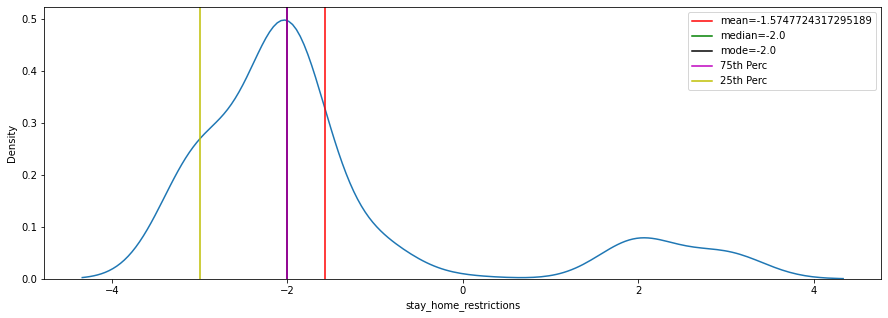

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


internal_movement_restrictions


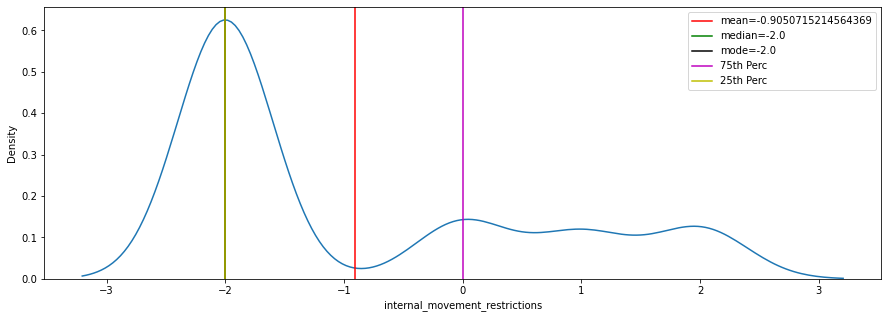

international_movement_restrictions


C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


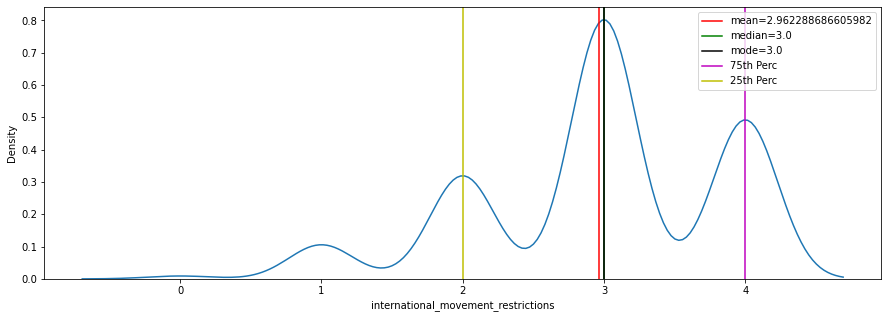

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


information_campaigns


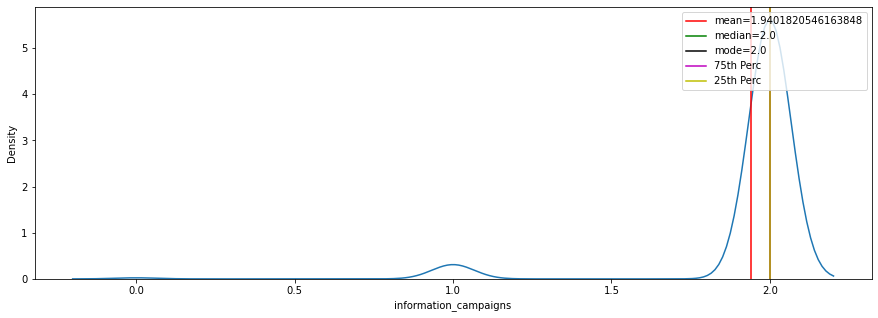

contact_tracing


C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


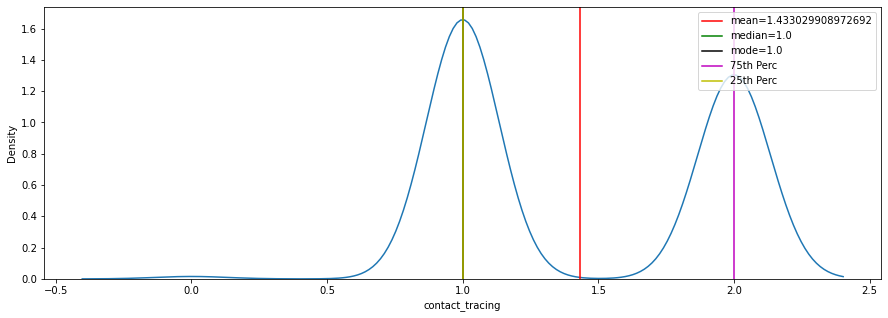

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


facial_coverings


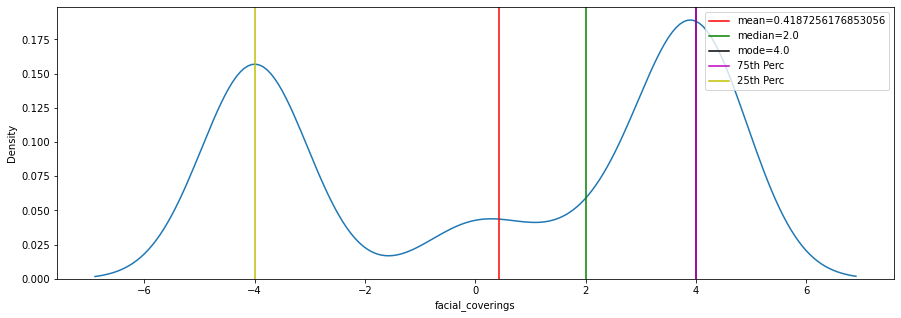

In [45]:
#Actual visualization
col_list = df_new1.columns

mean_col, median_col, mode_col = central_tendency(df_new1, col_list)

histogram(df_new1, mean_col, median_col, mode_col, col_list)

Visualizing the dataset, now the dataset is sorted in better manner. 

In [46]:
grouped_df

,confirmed,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
date,,,,,,,,,,,,,,
1,6754428.0,83801701.0,93558183.0,-59.0,-136.0,-89.0,-213.0,-37.0,-134.0,15.0,175.0,131.0,101.0,36.0
2,1847729.0,46873038.0,67188011.0,-114.0,-107.0,-77.0,-195.0,-44.0,-130.0,-40.0,171.0,129.0,119.0,126.0
3,2205677.0,62450096.0,26149671.0,-34.0,-62.0,-54.0,-131.0,-8.0,-85.0,-7.0,196.0,124.0,113.0,90.0
4,6835150.0,60689421.0,35935302.0,-23.0,-53.0,-13.0,-75.0,16.0,-42.0,-23.0,200.0,120.0,108.0,14.0
5,5952333.0,62637282.0,26738071.0,-26.0,-143.0,-12.0,-227.0,-94.0,-137.0,-99.0,207.0,125.0,93.0,14.0
6,2630683.0,102235850.0,29408567.0,-26.0,-156.0,-12.0,-219.0,-88.0,-60.0,-95.0,200.0,121.0,72.0,14.0
7,2928432.0,96475151.0,51922594.0,-20.0,-162.0,-12.0,-227.0,-92.0,-50.0,-99.0,207.0,125.0,74.0,14.0
8,3372311.0,117094835.0,57740581.0,-7.0,-146.0,-12.0,-225.0,-92.0,-117.0,-103.0,207.0,125.0,74.0,14.0
9,3464055.0,124451936.0,90100981.0,-66.0,-138.0,-12.0,-181.0,-88.0,-113.0,-100.0,200.0,121.0,72.0,9.0


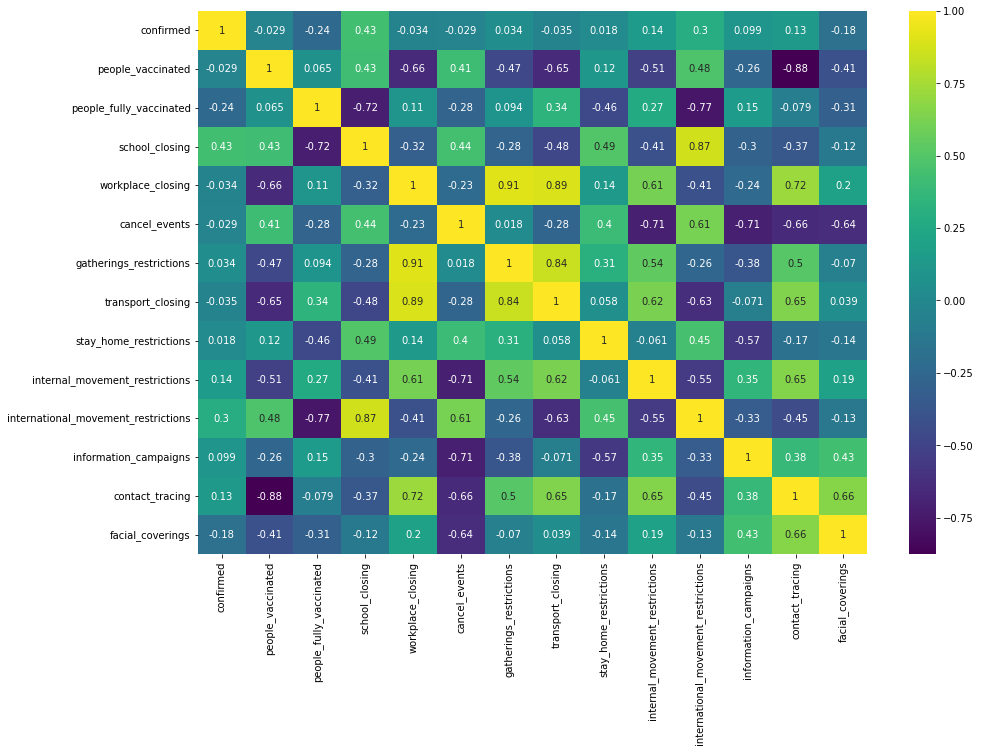

In [47]:
#Checking for the dataset correlataion 
plt.figure(figsize=(15,10))
sns.heatmap(grouped_df.corr(), annot=True, cmap='viridis')
plt.show()

Here when we grouped the dataset as per monthly basis, we found that how the precautions are affecting the confirmed cases in this scenario

# Hypothesis Testing

We have estimation that every feature in dataset affects the daily cases to be reduced

In [48]:
grouped_df.columns

Index(['confirmed', 'people_vaccinated', 'people_fully_vaccinated',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'contact_tracing', 'facial_coverings'],
      dtype='object')

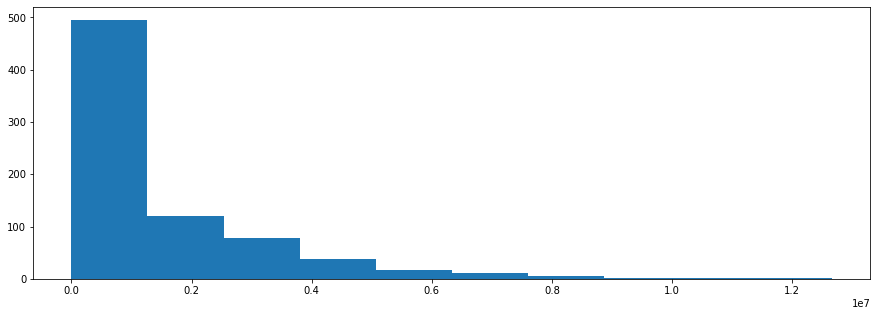

In [49]:
plt.figure(figsize=(15,5))
plt.hist(df_new1['people_vaccinated'])
plt.show()

as the distribution of the graph is right skewed. we need to first make it normal distributed.

C:\Users\mohsin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


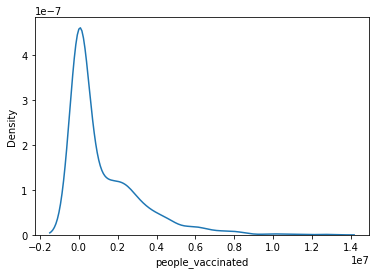

In [50]:
sns.distplot(df_new1['people_vaccinated'], hist=False, label = 'people_vaccinated')
plt.show()

In [51]:
print('The Mean Value is :',df_new1['people_vaccinated'].mean())
print('The standard Deviation is :',st.stdev(df_new1['people_vaccinated']))

The Mean Value is : 1255830.4031209364
The standard Deviation is : 1877572.8795217122


In [52]:
#Checking for Co-relation between the Samples using Spearman Co-relation and Pearson Co-relation
secondsample = df_new1['confirmed'].sample(frac=0.3)
for columns in df_new1:
    firstsample  = df_new1[columns].sample(frac = 0.3)
    from scipy.stats import spearmanr
    print('For Spearman Correlation Factor : ', columns)
    stat, p = spearmanr(firstsample, secondsample)
    print('stat=%.3f , p=%5f' % (stat, p))
    if p>0.05:
        print('independent samples')
    else:
        print('dependent samples')
    print('\n')

For Spearman Correlation Factor :  confirmed
stat=0.063 , p=0.339746
independent samples


For Spearman Correlation Factor :  people_vaccinated
stat=0.082 , p=0.212123
independent samples


For Spearman Correlation Factor :  people_fully_vaccinated
stat=0.054 , p=0.415014
independent samples


For Spearman Correlation Factor :  school_closing
stat=0.013 , p=0.838975
independent samples


For Spearman Correlation Factor :  workplace_closing
stat=-0.082 , p=0.214324
independent samples


For Spearman Correlation Factor :  cancel_events
stat=-0.091 , p=0.168346
independent samples


For Spearman Correlation Factor :  gatherings_restrictions
stat=-0.027 , p=0.684459
independent samples


For Spearman Correlation Factor :  transport_closing
stat=0.033 , p=0.620430
independent samples


For Spearman Correlation Factor :  stay_home_restrictions
stat=-0.019 , p=0.777620
independent samples


For Spearman Correlation Factor :  internal_movement_restrictions
stat=0.029 , p=0.658161
independent s

In [53]:
secondsample = df_new1['confirmed'].sample(frac=0.3)
for columns in df_new1:
    firstsample  = df_new1[columns].sample(frac = 0.3)
    from scipy.stats import pearsonr
    stat, p= pearsonr(firstsample, secondsample)
    print('For Pearson Correlation Factor : ', columns)
    print('stat=%.3f , p=%5f' % (stat, p))
    if p>0.05:
        print('independent samples')
    else:
        print('dependent samples')
    print('\n')

For Pearson Correlation Factor :  confirmed
stat=0.128 , p=0.052907
independent samples


For Pearson Correlation Factor :  people_vaccinated
stat=-0.062 , p=0.349130
independent samples


For Pearson Correlation Factor :  people_fully_vaccinated
stat=0.059 , p=0.375500
independent samples


For Pearson Correlation Factor :  school_closing
stat=0.044 , p=0.504489
independent samples


For Pearson Correlation Factor :  workplace_closing
stat=-0.004 , p=0.953854
independent samples


For Pearson Correlation Factor :  cancel_events
stat=0.008 , p=0.899684
independent samples


For Pearson Correlation Factor :  gatherings_restrictions
stat=-0.004 , p=0.951641
independent samples


For Pearson Correlation Factor :  transport_closing
stat=-0.041 , p=0.539268
independent samples


For Pearson Correlation Factor :  stay_home_restrictions
stat=-0.167 , p=0.011000
dependent samples


For Pearson Correlation Factor :  internal_movement_restrictions
stat=-0.039 , p=0.560432
independent samples


F

In [54]:
df_new1['confirmed'].mean()

55827.10533159948

In [55]:
df_new1['confirmed'].var()

6755154860.930291

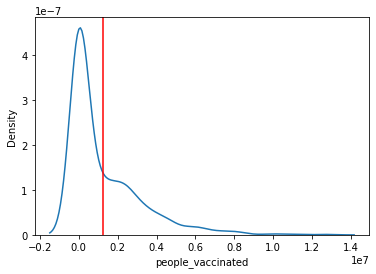

2.0101208527057217


In [56]:
sns.kdeplot(df_new1['people_vaccinated'])
plt.axvline(x=df_new1['people_vaccinated'].mean(), c='r')
plt.show()
print(df_new1['people_vaccinated'].skew())

C:\Users\mohsin\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mohsin\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


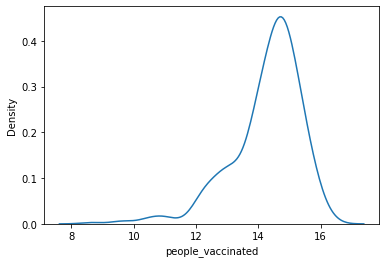

nan


In [57]:
sns.kdeplot(np.log(df_new1['people_vaccinated']))
plt.axvline(x=np.log(df_new1['people_vaccinated']).mean(), c='r')
plt.show()
print(np.log(df_new1['people_vaccinated']).skew())

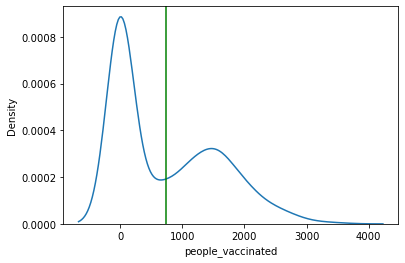

0.7287998504745091


In [58]:
sns.kdeplot(np.sqrt(df_new1['people_vaccinated']))
plt.axvline(x=np.sqrt(df_new1['people_vaccinated']).mean(), c='g')
plt.show()
print(np.sqrt(df_new1['people_vaccinated']).skew())

In [59]:
np.sqrt(df_new1['people_vaccinated']).mean()

737.1508165743645

In [60]:
np.sqrt(df_new1['people_vaccinated']).var()

713366.7317925311

In [61]:
st.stdev(np.sqrt(df_new1['people_vaccinated']))

844.6104023705418

**The skewness is reduced as we used the squared transformation**

as the Standard deviation has been reduced much and the datapoints are somewhat nearby towards mean. We can now perform Z-test on it.

Hypothesis needs to be defined that, the sample of the dataset shows the same behaviour as of the population. and it will be used further to analyse if in future we can use to predict the precautions that would be helpful

Hypothesis test:<br>
      \begin{equation} H_o : \mu = 55827.10533159948  \\ H_1 : \mu \neq 55827.105331599481 \end{equation}

Assuming $α=$ 0.05

As the dataset is not normally ditributed, we can use log method or sqrt method for normalizing the dataset

**Which type of test is this?**<br>
Its a 2 Tailed Test 

**Population details :-**

In [62]:
sd = st.stdev(np.sqrt(df_new1['people_vaccinated']))
sd

844.6104023705418

In [63]:
var = np.sqrt(df_new1['people_vaccinated']).var()
var

713366.7317925311

In [64]:
mu = np.sqrt(df_new1['people_vaccinated']).mean()
mu

737.1508165743645

**Sample details :-**

In [65]:
sample = np.sqrt(df_new1['people_vaccinated']).sample(frac = 0.3)
sample

622    1952.322719
451    1422.178610
116       0.000000
125       0.000000
351       0.000000
          ...     
657    1110.957245
665    1482.874910
579    1010.307379
698     948.827698
292       0.000000
Name: people_vaccinated, Length: 231, dtype: float64

In [66]:
sample.mean()

801.8681116136045

In [67]:
sample.var()

792642.2599753946

In [68]:
st.stdev(sample)

890.3045883153663

**Constructing the confidence interval**

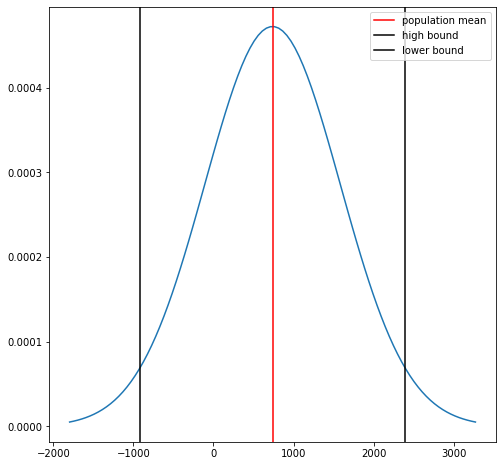

In [69]:
mu = 737.1508165743645
var = 713366.7317925311

sigma = math.sqrt(var)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.figure(figsize=(8,8))
plt.plot(x, stats.norm.pdf(x, mu, sigma))


plt.axvline(737.1508165743645, label = 'population mean', c = 'r')
#plt.axvline(1.16, label = 'sample mean', c = 'b')

plt.axvline(mu -1.96*np.sqrt(var), label = 'high bound', c = 'k')
plt.axvline(mu +1.96*np.sqrt(var), label = 'lower bound', c = 'k')


plt.legend()
plt.show()

As the sample size is greater than 30, Z-Test Hypothesis is required:-

In [72]:
#Importing ztest library
from statsmodels.stats.weightstats import ztest

In [74]:
#Testing hypothsis on a single dataset
ztest_Score, p_value = ztest(sample, value=mu)
print('ztest_Score :', ztest_Score)
print('p_value :', p_value)
if(p_value <  0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

ztest_Score : 1.1048103530905693
p_value : 0.2692417734788166
Fail to Reject NUll Hypothesis


Defining a function for calculating ztest on all features

In [75]:
for columns in df_new1:
    mu = np.sqrt(df_new1[columns]).mean()
    var = np.sqrt(df_new1[columns]).var()
    sd = st.stdev(np.sqrt(df_new1[columns]))
    sample = np.sqrt(df_new1[columns]).sample(frac = 0.3)
    ztest_Score, p_value = ztest(sample, value=mu)
    print("The Z-test for :", columns)
    print('ztest_Score :', ztest_Score)
    print('p_value :', p_value)
    if(p_value <  0.05):
      print("Reject Null Hypothesis")
    else:
      print("Fail to Reject NUll Hypothesis")
    print('\n')

The Z-test for : confirmed
ztest_Score : -0.06575364980789467
p_value : 0.9475739584238062
Fail to Reject NUll Hypothesis


The Z-test for : people_vaccinated
ztest_Score : 0.4720174528058454
p_value : 0.6369143312126173
Fail to Reject NUll Hypothesis


The Z-test for : people_fully_vaccinated
ztest_Score : 0.6292921617387737
p_value : 0.5291578019434984
Fail to Reject NUll Hypothesis


The Z-test for : school_closing
ztest_Score : nan
p_value : nan
Fail to Reject NUll Hypothesis


The Z-test for : workplace_closing
ztest_Score : nan
p_value : nan
Fail to Reject NUll Hypothesis


The Z-test for : cancel_events
ztest_Score : nan
p_value : nan
Fail to Reject NUll Hypothesis


The Z-test for : gatherings_restrictions
ztest_Score : nan
p_value : nan
Fail to Reject NUll Hypothesis


The Z-test for : transport_closing
ztest_Score : nan
p_value : nan
Fail to Reject NUll Hypothesis


The Z-test for : stay_home_restrictions
ztest_Score : nan
p_value : nan
Fail to Reject NUll Hypothesis


The Z-

C:\Users\mohsin\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


**Using Exponential Method for Standardizing the dataset**

In [76]:
for columns in df_new1:
    mu = (df_new1[columns]**(1/1.2)).mean()
    var = (df_new1[columns]**(1/1.2)).var()
    sd = st.stdev(df_new1[columns]**(1/1.2))
    sample = np.sqrt(df_new1[columns]**(1/1.2)).sample(frac = 0.3)
    ztest_Score, p_value = ztest(sample, value=mu)
    print("The Z-test for :", columns)
    print('ztest_Score :', ztest_Score)
    print('p_value :', p_value)
    if(p_value <  0.05):
      print("Reject Null Hypothesis")
    else:
      print("Fail to Reject NUll Hypothesis")
    print('\n')

The Z-test for : confirmed
ztest_Score : -2606.633432937275
p_value : 0.0
Reject Null Hypothesis


The Z-test for : people_vaccinated
ztest_Score : -6585.988285057157
p_value : 0.0
Reject Null Hypothesis


The Z-test for : people_fully_vaccinated
ztest_Score : -5853.5537509939
p_value : 0.0
Reject Null Hypothesis


The Z-test for : school_closing
ztest_Score : nan
p_value : nan
Fail to Reject NUll Hypothesis


The Z-test for : workplace_closing
ztest_Score : nan
p_value : nan
Fail to Reject NUll Hypothesis


The Z-test for : cancel_events
ztest_Score : nan
p_value : nan
Fail to Reject NUll Hypothesis


The Z-test for : gatherings_restrictions
ztest_Score : nan
p_value : nan
Fail to Reject NUll Hypothesis


The Z-test for : transport_closing
ztest_Score : nan
p_value : nan
Fail to Reject NUll Hypothesis


The Z-test for : stay_home_restrictions
ztest_Score : nan
p_value : nan
Fail to Reject NUll Hypothesis


The Z-test for : internal_movement_restrictions
ztest_Score : nan
p_value : nan

All other parametric techniques cant be used as it does not give accurate values. 

Thus We fail to reject the null Hypthesis that is we are accepting the population mean and aspect that the correlation between the measures and the cases increment is accurate.

## For those values whose correlation is negative affects the covid cases as not to increase